# Exercise 3: Sequential Agent

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [2]:
class SequentialAgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    message: str


def named_message_node_function(state: SequentialAgentState) -> SequentialAgentState:
    """Add a custom message with the name given in the state"""

    state['message'] = f"Welcome, {state['name']}! "

    return state


def age_description_node_function(state: SequentialAgentState) -> SequentialAgentState:
    """Describe the user's age as a message"""

    state['message'] += f"Your age is {state['age']}. "

    return state


def skills_formatting_node_function(state: SequentialAgentState) -> SequentialAgentState:
    """Describe the user's skills as a message"""

    if not state["skills"]:
        skills_message = "You haven't listed any skills."
    elif len(state["skills"]) == 1:
        skills_message = f"Your skill is: {state['skills'][0]}."
    else:
        skills_message = f"Your skills are: {', '.join(state['skills'][:-1])}, and {state['skills'][-1]}."

    state['message'] += skills_message

    return state

In [3]:
named_message_node_key = "named_message_node"
age_description_node_key = "age_description_node"
skills_formatting_node_key = "skills_formatting_node"

graph = StateGraph(SequentialAgentState)

graph.add_node(named_message_node_key, named_message_node_function)
graph.add_node(age_description_node_key, age_description_node_function)
graph.add_node(skills_formatting_node_key, skills_formatting_node_function)

graph.add_edge(START, named_message_node_key)
graph.add_edge(named_message_node_key, age_description_node_key)
graph.add_edge(age_description_node_key, skills_formatting_node_key)
graph.add_edge(skills_formatting_node_key, END)

agent = graph.compile()

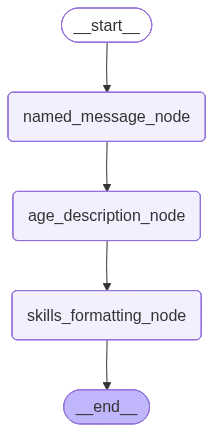

In [4]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [5]:
result = agent.invoke(
    {
        "name": "Luis",
        "age": 24,
        "skills": ["A", "B", "C"]
    }
)

result["message"]

'Welcome, Luis! Your age is 24. Your skills are: A, B, and C.'